# Coursework

You are working as a Data Scientist for a (fictitious) manufacturing company who
makes metal parts for various industries. They have been experimenting with a new
metal alloy that should have superior properties to the one they are currently using;
however, in practice they have been finding it is very sensitive to changes in the
processing parameters causing defects to form. If these defects reach a certain size,
they severely impact the lifespan of the metal parts, meaning the entire part must be
scrapped as defective.

However, the process of measuring a parts lifespan is a slow, destructive, and
expensive process, so the company are hoping you can create a Machine Learning
solution that allows them to estimate the lifespan of a part based on the more easily
recorded parameters, which the company hopes to use to refine their production
process. A secondary objective for the company is for you to create a Machine
Learning solution that can use the provided scans to automatically classify whether a
part is defective or not, as they are currently having to do this manually.

The company has collected two sets of data:

1. A table of processing parameters and measurements taken from the
completed parts.

2. A collection of images from scanning the surface of the completed parts.

Both sets of data provided have been cleaned (so there is no need to check for
incorrect, duplicate, or missing data) with labels/lifespan measurements attached to
prepare the data for the supervised learning tasks.

-------------------------------------------


## Libraries

In [ ]:
# General libraries
import pandas as pd
import numpy as np
from google.colab import files

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library for scaling
from sklearn.preprocessing import MinMaxScaler

# Libraries for Regression algorithm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor

# Libraries for Classfier algorithms=
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Libraries for image classification
import os
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

# Metrics Libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, r2_score

## Importing Dataset

### Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Specify the path to your CSV file on Google Drive
alloy_csv = '/content/drive/MyDrive/bigdata/uog/ml/cw/COMP1801_CourseworkDataset1_tabular.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
print(df)


In [ ]:
uploaded = files.upload()
alloy_csv = pd.read_csv('COMP1801_CourseworkDataset1_tabular.csv')

Saving COMP1801_CourseworkDataset1_tabular.csv to COMP1801_CourseworkDataset1_tabular.csv


In [ ]:
df = pd.DataFrame(data = alloy_csv)
df.head()

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,284.161690,Blade,colGrain,25,4.460592,7.937116,22,0,7,Top,Investment
1,1599.551748,Blade,singleGrain,9,1.425973,2.432948,2,0,0,Bottom,Die
2,768.311031,Nozzle,colGrain,26,2.508879,3.841211,25,0,0,Bottom,Investment
3,1697.663828,Blade,colGrain,12,3.248913,2.610700,10,0,0,Bottom,Continuous
4,1491.478862,Nozzle,colGrain,20,1.901670,4.634926,24,0,0,Top,Die


### Data Analysis

In [ ]:
df.describe()

,Lifespan,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,1366.373468,17.480000,2.786059,5.497136,13.37100,0.117000,0.286000
std,519.026551,7.557958,1.320935,2.613501,8.07047,0.565359,1.351307
min,115.120563,5.000000,0.501046,1.017799,0.00000,0.000000,0.000000
25%,960.976320,11.000000,1.608916,3.203739,8.00000,0.000000,0.000000
50%,1470.377014,17.000000,2.824488,5.510765,16.00000,0.000000,0.000000
75%,1757.165684,24.000000,3.902389,7.735951,20.00000,0.000000,0.000000
max,2380.142759,30.000000,4.990795,9.988511,33.00000,4.000000,10.000000


In [ ]:
df.describe(include=object)

,partType,microstructure,seedLocation,castType
count,1000,1000,1000,1000
unique,4,3,2,3
top,Nozzle,singleGrain,Top,Continuous
freq,293,357,507,356


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lifespan        1000 non-null   float64
 1   partType        1000 non-null   object 
 2   microstructure  1000 non-null   object 
 3   coolingRate     1000 non-null   int64  
 4   quenchTime      1000 non-null   float64
 5   forgeTime       1000 non-null   float64
 6   smallDefects    1000 non-null   int64  
 7   largeDefects    1000 non-null   int64  
 8   sliverDefects   1000 non-null   int64  
 9   seedLocation    1000 non-null   object 
 10  castType        1000 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


**Note:**

* Dataset is having 1000 enties and 11 features.
* No null or NaN values.
* "Lifespan" feature is the target column.
* We need encoding in object features like "partType", "microstructure", "seedLocation" and "castType"

### Exploratory Data Analysis

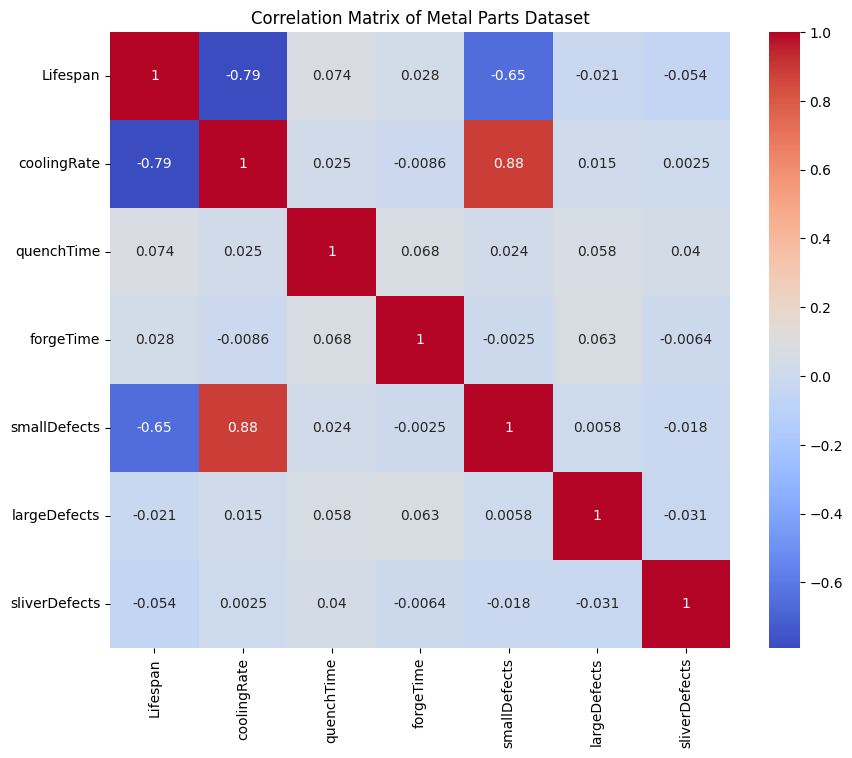

In [ ]:
# Calculate and display the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Metal Parts Dataset")

plt.show()

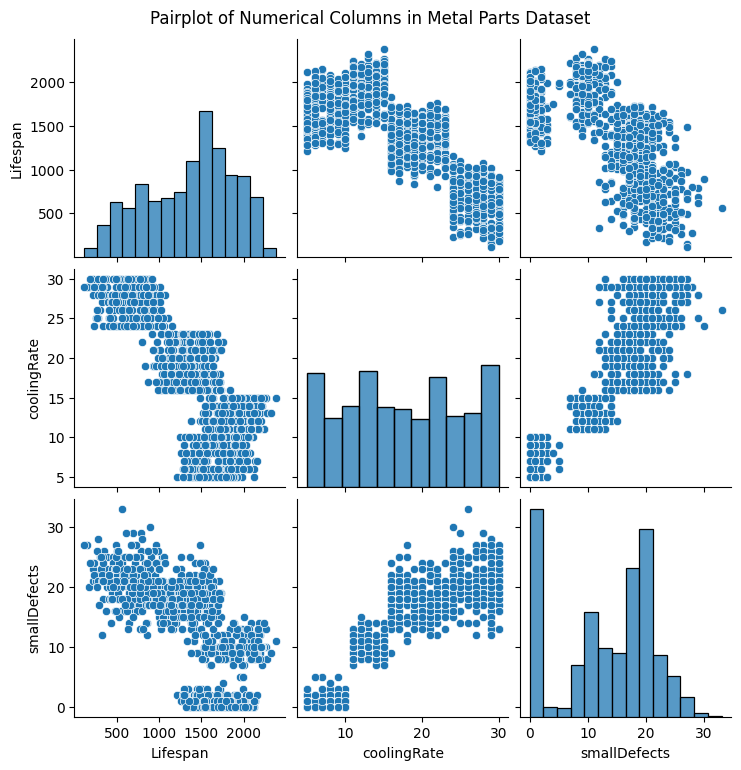

In [ ]:
# Selecting only numerical columns for the pairplot
data = df[['Lifespan','coolingRate','smallDefects']]

# Creating a pairplot with the selected numerical data
sns.pairplot(data)
plt.suptitle("Pairplot of Numerical Columns in Metal Parts Dataset", y=1.02)
plt.show()

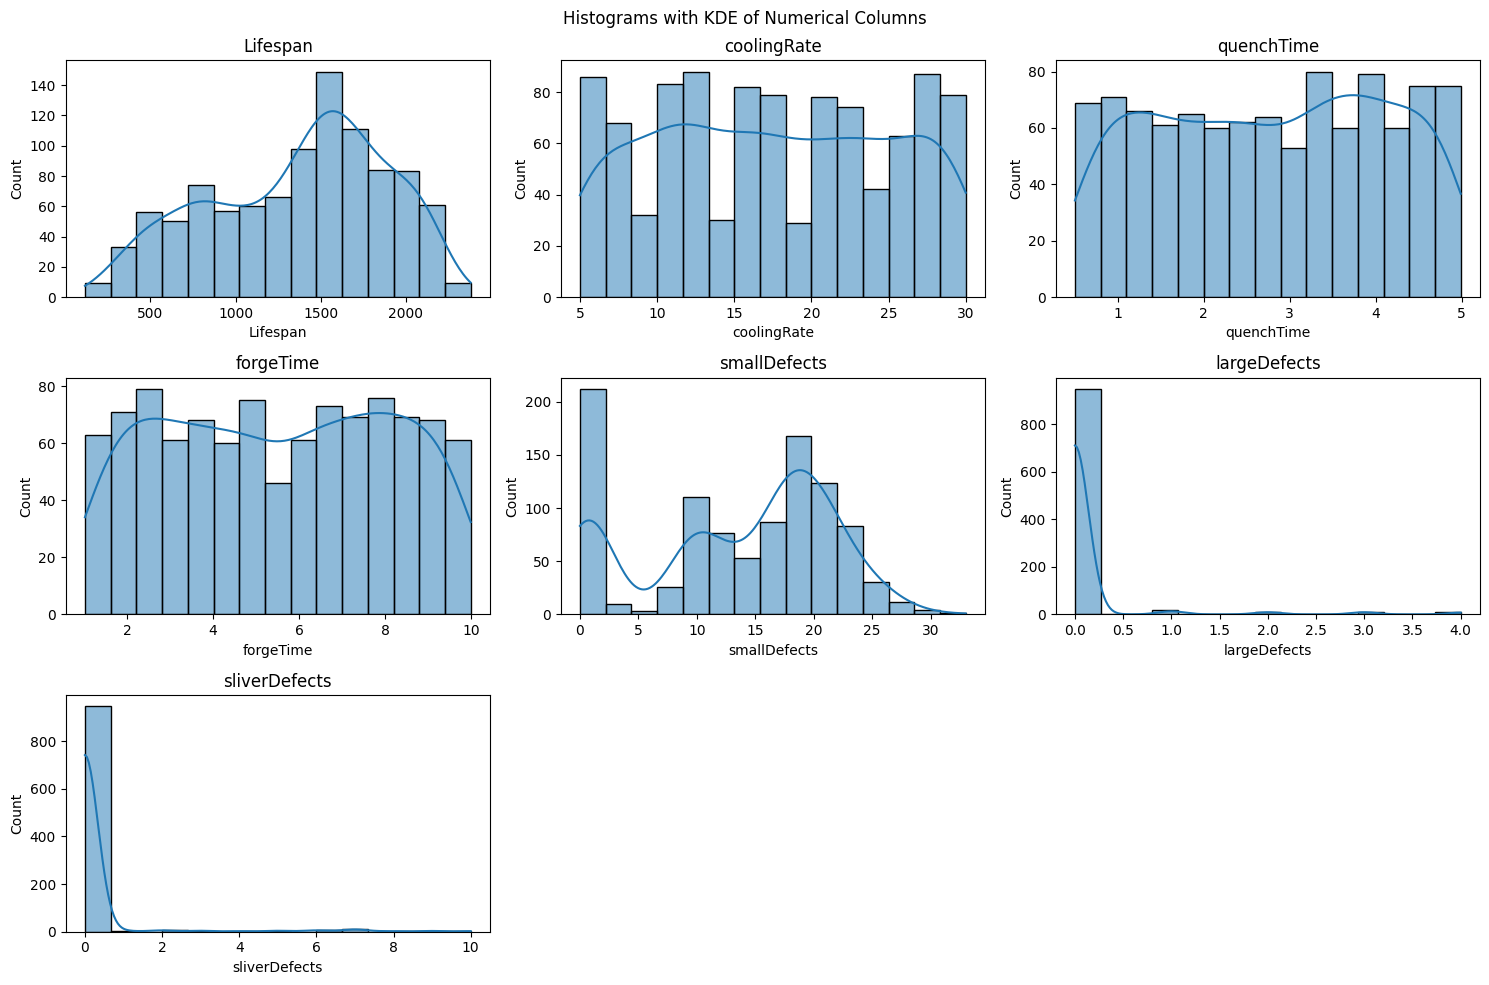

In [ ]:
# Plot histograms for the numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[column], kde=True, bins=15)
    plt.title(column)
plt.suptitle('Histograms with KDE of Numerical Columns')
plt.tight_layout()
plt.show()

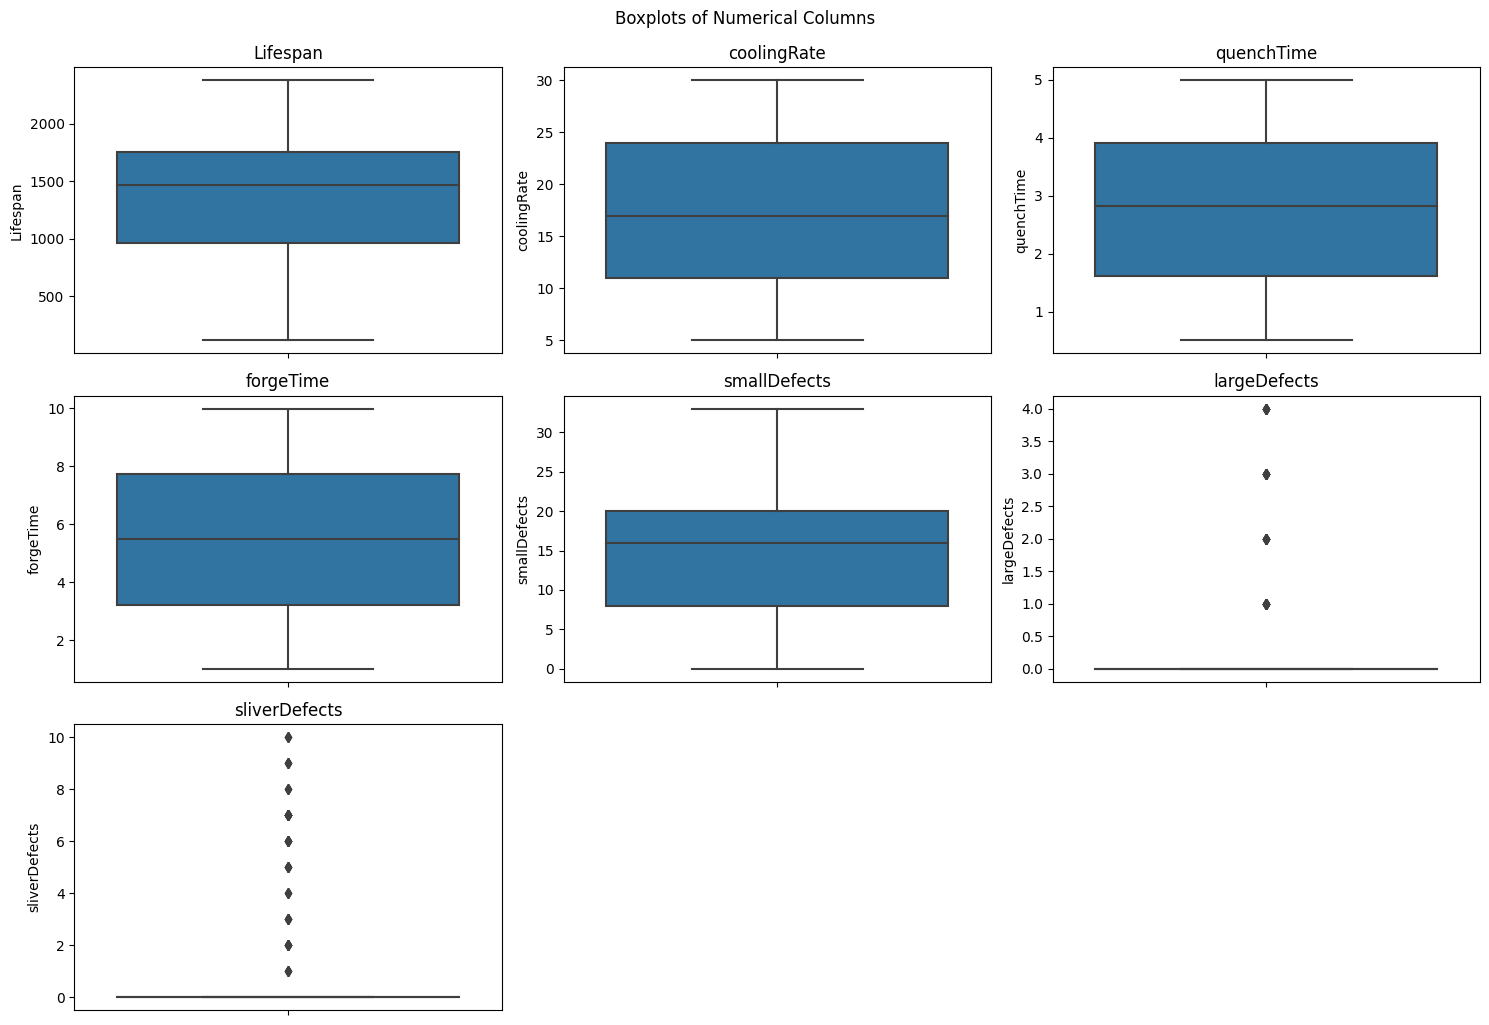

In [ ]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.suptitle("Boxplots of Numerical Columns", y = 1.02)
plt.show()

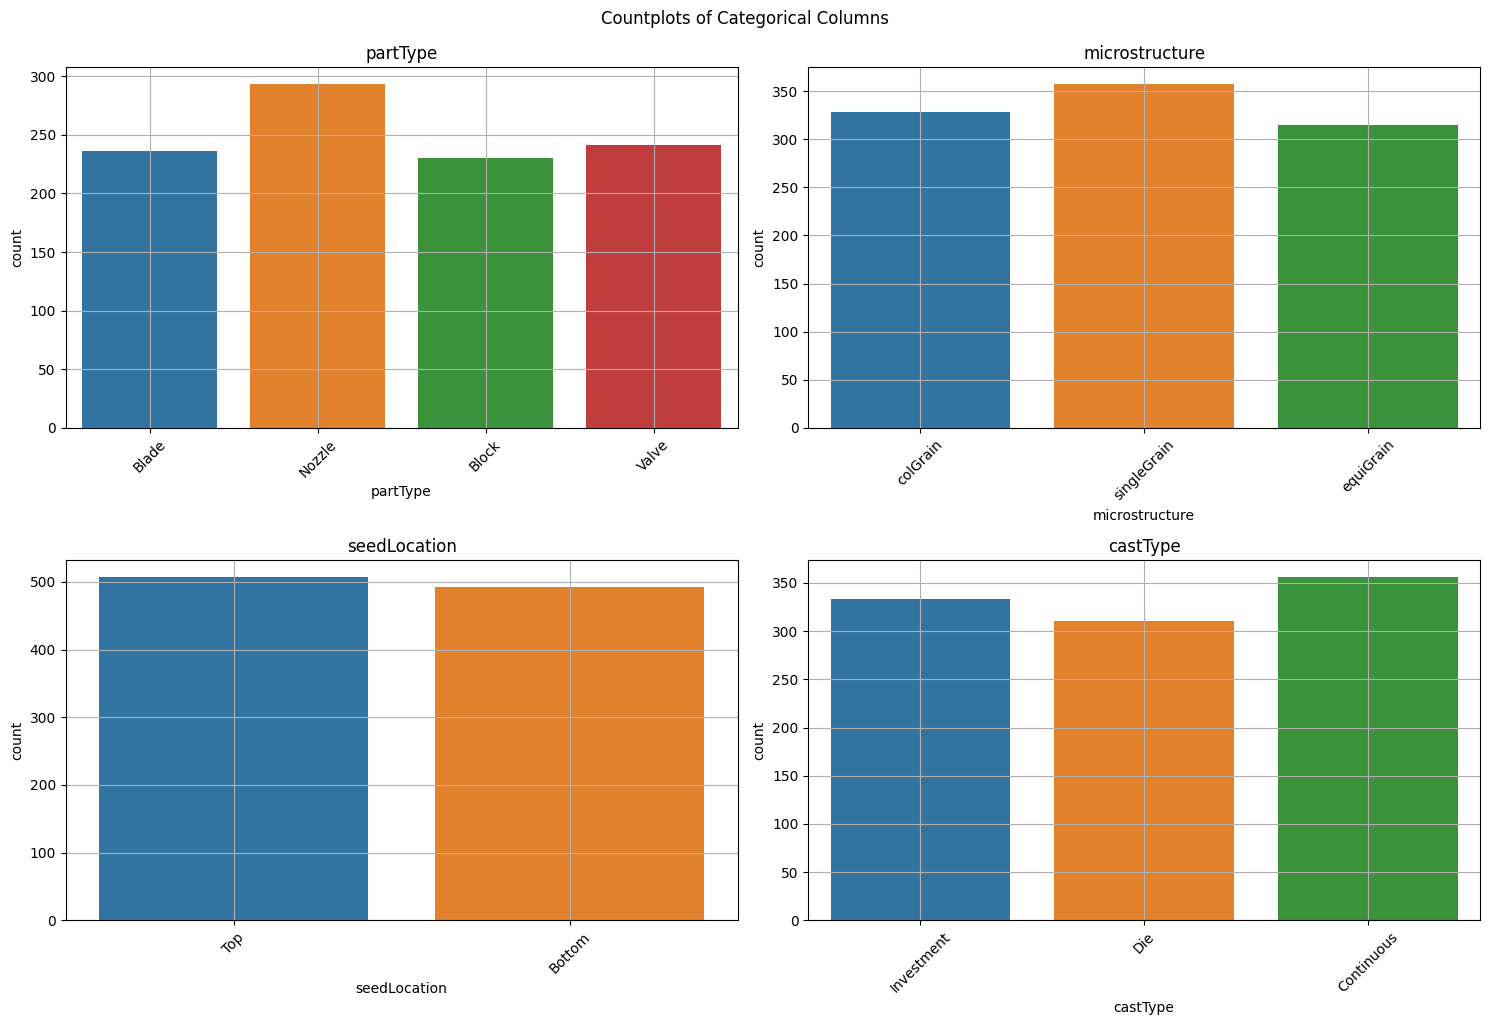

In [ ]:
plt.figure(figsize=(15, 10))
categorical_columns = df.select_dtypes(include=['object']).columns
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[column])
    plt.title(column)
    plt.xticks(rotation=45)
    plt.grid()
plt.tight_layout()
plt.suptitle("Countplots of Categorical Columns", y = 1.02)
plt.show()

### Data Preprocessing

### Scaling

In [ ]:
scaler = MinMaxScaler()

features = df.drop(columns=['Lifespan'])
numerical_data = features.select_dtypes(include=['float64', 'int64'])

# Fit and transform the data
scaled_data_min_max = scaler.fit_transform(numerical_data)

# Converting back to a DataFrame
scaled_data_min_max_df = pd.DataFrame(scaled_data_min_max, columns=numerical_data.columns)

In [ ]:
df[['coolingRate', 'quenchTime', 'forgeTime', 'smallDefects','largeDefects', 'sliverDefects']] = scaled_data_min_max_df[['coolingRate', 'quenchTime', 'forgeTime', 'smallDefects','largeDefects', 'sliverDefects']]
df

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,284.161690,Blade,colGrain,0.80,0.881908,0.771323,0.666667,0.0,0.7,Top,Investment
1,1599.551748,Blade,singleGrain,0.16,0.206009,0.157752,0.060606,0.0,0.0,Bottom,Die
2,768.311031,Nozzle,colGrain,0.84,0.447204,0.314737,0.757576,0.0,0.0,Bottom,Investment
3,1697.663828,Blade,colGrain,0.28,0.612031,0.177567,0.303030,0.0,0.0,Bottom,Continuous
4,1491.478862,Nozzle,colGrain,0.60,0.311961,0.403215,0.727273,0.0,0.0,Top,Die
...,...,...,...,...,...,...,...,...,...,...,...
995,462.984817,Blade,equiGrain,0.76,0.339123,0.192171,0.606061,0.0,0.0,Bottom,Continuous
996,1426.298870,Nozzle,equiGrain,0.64,0.276324,0.689825,0.363636,0.0,0.0,Bottom,Investment
997,1538.072772,Blade,colGrain,0.36,0.257877,0.809143,0.363636,0.0,0.0,Top,Investment
998,1893.052813,Nozzle,equiGrain,0.16,0.361550,0.447627,0.000000,0.0,0.0,Bottom,Continuous


#### Encoding

In [ ]:
le = LabelEncoder()

columns_to_encode = ["microstructure","seedLocation","castType"]

# for col in columns_to_encode:
#   df[col] = le.fit_transform(df[col])

df[columns_to_encode] = df[columns_to_encode].apply(le.fit_transform) # label encoding
df = pd.get_dummies(df, columns = ['partType']) # One-hot encoding

df.head()

,Lifespan,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType,partType_Blade,partType_Block,partType_Nozzle,partType_Valve
0,284.161690,0,0.80,0.881908,0.771323,0.666667,0.0,0.7,1,2,1,0,0,0
1,1599.551748,2,0.16,0.206009,0.157752,0.060606,0.0,0.0,0,1,1,0,0,0
2,768.311031,0,0.84,0.447204,0.314737,0.757576,0.0,0.0,0,2,0,0,1,0
3,1697.663828,0,0.28,0.612031,0.177567,0.303030,0.0,0.0,0,0,1,0,0,0
4,1491.478862,0,0.60,0.311961,0.403215,0.727273,0.0,0.0,1,1,0,0,1,0


### Regression Implementation



Create a regression model to predict the lifetime of a metal part using traditional
machine learning methods.

You should describe the experiments performed to obtain and optimize your final
model; these experiments should be rigorous and include comparisons between
**different models and hyper-parameter tuning**. All choices should be justified using
theory and/or experiments.

The final model chosen should be described in all detail – summarizing all relevant
hyper parameters chosen and providing a brief explanation of how the algorithm
works.

You should evaluate your final model using a test dataset not used in the prior
experimentation stages using appropriate regression performance metrics. You
should explain how these metrics work, why they are appropriate to the task and
provide a written interpretation of how well your model is performing at the given task
using these metrics.

----------

#### Data splitting

In [ ]:
# Datasetsplitting to train and split

X = df.drop('Lifespan', axis = 1)
y = df["Lifespan"]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# Split the data into non-test/test data
# While we have 10000 pairs of a feature and target, we use 20% only for the testing, not so we hold back the other 80% for training and validation
# `shuffle=True` for non-time series case. You should set `shuffle=False` for time series data to avoid future data being contaminated in the training data.
X_non_test, X_test, y_non_test, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

# Split the non-test data into non-test/test data
# We use 25% of the remaining non-test data only for the validation set, leaving the rest for training
# In the end, the splitting ratio will be 6:2:2 for the training, validation, and test data.
# `shuffle=True` for non-time series case. You should set `shuffle=False` for time series data to avoid future data being contaminated in the training data.
X_train, X_valid, y_train, y_valid = train_test_split(X_non_test, y_non_test, test_size=0.25, shuffle=True, random_state=0)

#### Regression Models

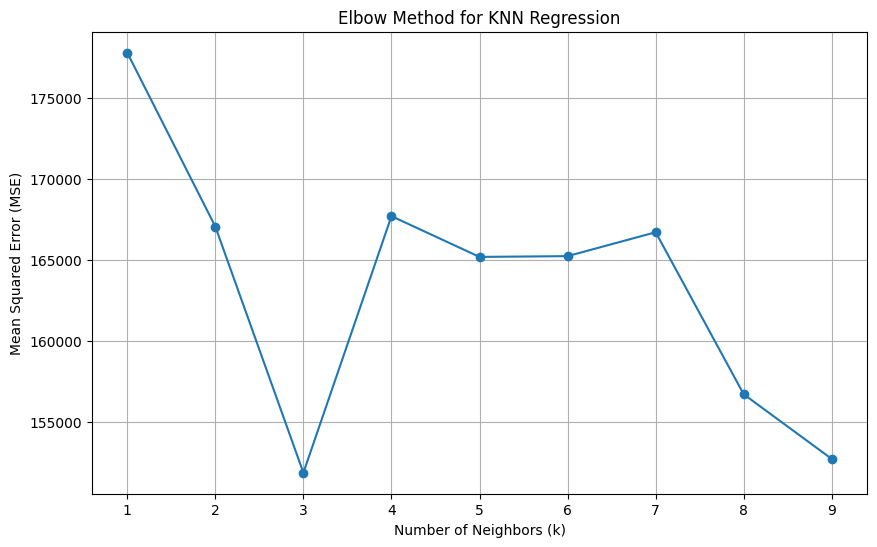

In [ ]:
# Define a range of k values to test
k_values = list(range(1, 10))
mse_values = []

# Perform KNN Regressor for each k value
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot k vs. MSE
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Method for KNN Regression')
plt.grid(True)
plt.show()

In [ ]:
# Create a list of regression models
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regresision', Ridge(alpha = 1.0)),
    ('KNeighborsRegressor', KNeighborsRegressor(n_neighbors=3)),
    ('Lasso Refression', Lasso(alpha = 1.0)),
    ('Polynomial Regression', LinearRegression()),
    ('Support Vector Machine', SVR(kernel='linear', C=100, gamma= 0.1, epsilon = 0.1)),
    ('Decision Tree Regression', DecisionTreeRegressor(max_depth=10)),
    ('Random Forest Regression', RandomForestRegressor(n_estimators=100, max_depth=10)),
    ('GradientBoostingRegressor', GradientBoostingRegressor(max_depth = 10, n_estimators=100, learning_rate=0.1, random_state=42)),
    ('XGBoost Regressor', XGBRegressor(max_depth = 10, n_estimators=100, learning_rate=0.1, random_state=42, subsample = 0.1, colsample_bytree = 0.8))
]

results = {
    "Algorithm": [],
    "MSE": [],
    "R2" : []
}

for model_name, model in models:
    if model_name == 'Polynomial Regression':
        poly_features = PolynomialFeatures(degree=3)
        X_poly_train = poly_features.fit_transform(X_train)
        X_poly_test = poly_features.transform(X_test)
        model.fit(X_poly_train, y_train)
        y_pred = model.predict(X_poly_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results["Algorithm"].append(model_name)
    results["MSE"].append(mse)
    results["R2"].append(r2)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display or save the results
print(results_df)

                   Algorithm           MSE            R2
0          Linear Regression  5.695117e+04  8.057586e-01
1          Ridge Regresision  5.777345e+04  8.029540e-01
2        KNeighborsRegressor  1.518428e+05  4.821149e-01
3           Lasso Refression  5.727186e+04  8.046648e-01
4      Polynomial Regression  1.165313e+26 -3.974494e+20
5     Support Vector Machine  6.147426e+04  7.903318e-01
6   Decision Tree Regression  1.291516e+04  9.559507e-01
7   Random Forest Regression  6.511489e+03  9.777915e-01
8  GradientBoostingRegressor  1.121977e+04  9.617331e-01
9          XGBoost Regressor  5.615049e+03  9.808489e-01


#### Hyper-parameter tuning

In [ ]:
xgb_regressor = XGBRegressor()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the XGBoost Regressor with the best hyperparameters
best_xgb_regressor = XGBRegressor(**best_params)
best_xgb_regressor.fit(X_train, y_train)

# Make predictions
y_pred = best_xgb_regressor.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Best Hyperparameters: {best_params}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

Best Hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Mean Squared Error: 2387.8159655262225
R-squared (R2): 0.9918559559757979


#### Final Model with best parameters (XGBoost Regressor):

In [ ]:
model = 'XGBoost Regressor', XGBRegressor(max_depth = 3, n_estimators=300, learning_rate=0.1, random_state=42, subsample = 0.8, colsample_bytree = 0.9)
# Train the XGBoost Regressor with the best hyperparameters
best_xgb_regressor = XGBRegressor(**best_params)
best_xgb_regressor.fit(X_train, y_train)

# Make predictions
y_pred = best_xgb_regressor.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Best Hyperparameters: {best_params}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

Best Hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Mean Squared Error: 2387.8159655262225
R-squared (R2): 0.9918559559757979


### Binary Classification Implementation

Your line manager has decided that rather than the exact lifetime of a part, it is more
important to know whether a part has a lifetime above 1500 hours (determined as
the minimum lifetime before a part is considered defective).

Alter the data accordingly to replace the lifetime with a binary target and create a
binary classification model using traditional Machine Learning methods that can
predict whether a part is defective or not.

You should describe the experiments performed to obtain and optimize your final
model; these experiments should be rigorous and include comparisons between
different models and hyper-parameter tuning. All choices should be justified using
theory and/or experiments.

The final model chosen should be described in all detail – summarizing all relevant
hyper parameters chosen and providing a brief explanation of how the algorithm
works.

You should evaluate your final model using a test dataset not used in the prior
experimentation stages using appropriate classification performance metrics, a
confusion matrix and comparison with a trivial baseline. You should explain how
these metrics work, why they are appropriate and provide a written interpretation of
how well your model is performing at the given task considering these results.

----------------

#### Data Loading

In [ ]:
df2 = pd.DataFrame(data = df)
df2.head()

,Lifespan,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType,partType_Blade,partType_Block,partType_Nozzle,partType_Valve
0,284.161690,0,0.80,0.881908,0.771323,0.666667,0.0,0.7,1,2,1,0,0,0
1,1599.551748,2,0.16,0.206009,0.157752,0.060606,0.0,0.0,0,1,1,0,0,0
2,768.311031,0,0.84,0.447204,0.314737,0.757576,0.0,0.0,0,2,0,0,1,0
3,1697.663828,0,0.28,0.612031,0.177567,0.303030,0.0,0.0,0,0,1,0,0,0
4,1491.478862,0,0.60,0.311961,0.403215,0.727273,0.0,0.0,1,1,0,0,1,0


#### Feature Engineering

In [ ]:
def lifespan_category(ls):
  if ls > 1500:
    return 'Non_Defective'
  else:
    return 'Defective'

df2['Lifespan_condition'] = df2['Lifespan'].apply(lifespan_category)
df2.drop('Lifespan', axis=1, inplace = True)

df2.head()

,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType,partType_Blade,partType_Block,partType_Nozzle,partType_Valve,Lifespan_condition
0,0,0.80,0.881908,0.771323,0.666667,0.0,0.7,1,2,1,0,0,0,Defective
1,2,0.16,0.206009,0.157752,0.060606,0.0,0.0,0,1,1,0,0,0,Non_Defective
2,0,0.84,0.447204,0.314737,0.757576,0.0,0.0,0,2,0,0,1,0,Defective
3,0,0.28,0.612031,0.177567,0.303030,0.0,0.0,0,0,1,0,0,0,Non_Defective
4,0,0.60,0.311961,0.403215,0.727273,0.0,0.0,1,1,0,0,1,0,Defective


In [ ]:
df2['Lifespan_condition'].value_counts()

Defective        529
Non_Defective    471
Name: Lifespan_condition, dtype: int64

In [ ]:
df2['Lifespan_condition'] = df2['Lifespan_condition'].map({'Defective': 0, 'Non_Defective': 1})
df2.head()

,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType,partType_Blade,partType_Block,partType_Nozzle,partType_Valve,Lifespan_condition
0,0,0.80,0.881908,0.771323,0.666667,0.0,0.7,1,2,1,0,0,0,0
1,2,0.16,0.206009,0.157752,0.060606,0.0,0.0,0,1,1,0,0,0,1
2,0,0.84,0.447204,0.314737,0.757576,0.0,0.0,0,2,0,0,1,0,0
3,0,0.28,0.612031,0.177567,0.303030,0.0,0.0,0,0,1,0,0,0,1
4,0,0.60,0.311961,0.403215,0.727273,0.0,0.0,1,1,0,0,1,0,0


#### Data splitting and Modelling

In [ ]:
X = df2.drop('Lifespan_condition', axis = 1)
y = df2["Lifespan_condition"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#### Modelling

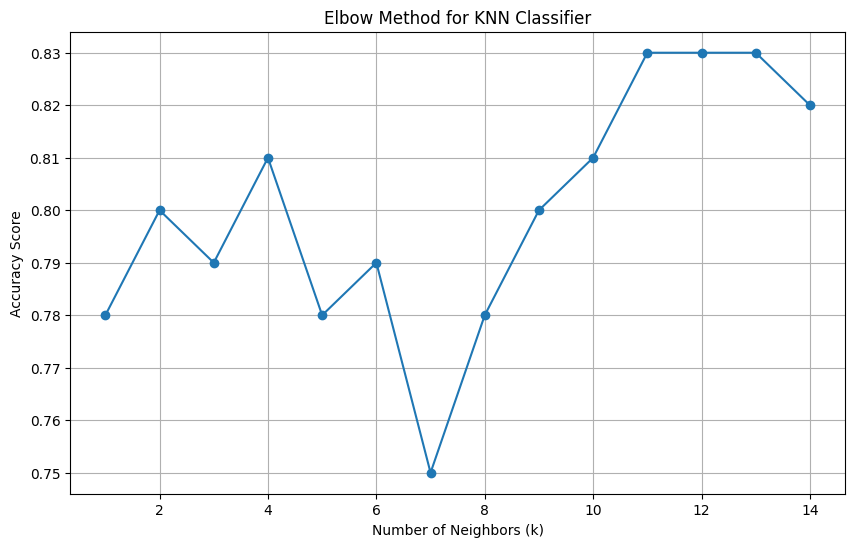

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Define a range of k values to test
k_values = list(range(1, 15))
accuracy = []

# Perform KNN Regressor for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)

# Plot k vs. MSE
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.title('Elbow Method for KNN Classifier')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a dictionary to store algorithm results
results2 = {
    "Algorithm": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
    "ROC-AUC": [],
}

# Define the classification algorithms to compare
algorithms = [
    ("Support Vector Machine", SVC()),
    ("Logistic Regression", LogisticRegression(max_iter = 1000, solver = 'lbfgs')),
    ("Naive Bayes Classifier", GaussianNB()),
    ("KNN Classifier", (KNeighborsClassifier(n_neighbors = 11))),
    ("Decision Tree",(DecisionTreeClassifier())),
    ("Random Forest Classifier", RandomForestClassifier())
]

# Evaluate each algorithm
for name, model in algorithms:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Store results in the dictionary
    results2["Algorithm"].append(name)
    results2["Accuracy"].append(accuracy)
    results2["Precision"].append(precision)
    results2["Recall"].append(recall)
    results2["F1 Score"].append(f1)
    results2["ROC-AUC"].append(roc_auc)

# Create a DataFrame from the results
results_df = pd.DataFrame(results2)

# Display or save the results
print(results_df)

                  Algorithm  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0    Support Vector Machine      0.88   0.844444  0.883721  0.863636  0.880457
1       Logistic Regression      0.88   0.844444  0.883721  0.863636  0.880457
2    Naive Bayes Classifier      0.87   0.857143  0.837209  0.847059  0.865973
3            KNN Classifier      0.83   0.795455  0.813953  0.804598  0.828029
4             Decision Tree      0.89   0.833333  0.930233  0.879121  0.894941
5  Random Forest Classifier      0.92   0.857143  0.976744  0.913043  0.926969


In [ ]:
rfc = RandomForestClassifier()


# Define a grid of hyperparameters to search
param_grid = {
    'bootstrap': [True, False],
 'max_depth': [10, 20, 30],
  'max_features': ['auto', 'sqrt'],
  'min_samples_leaf': [1, 2, 4],
  'min_samples_split': [2, 5, 10],
  'n_estimators': [50, 75]
}

# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the XGBoost Regressor with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = best_rf_classifier.predict(X_test)

# Calculate the performance metrics
acc = accuracy_score(y_test, y_pred)

print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy Score: {acc}')

Best Hyperparameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy Score: 0.93


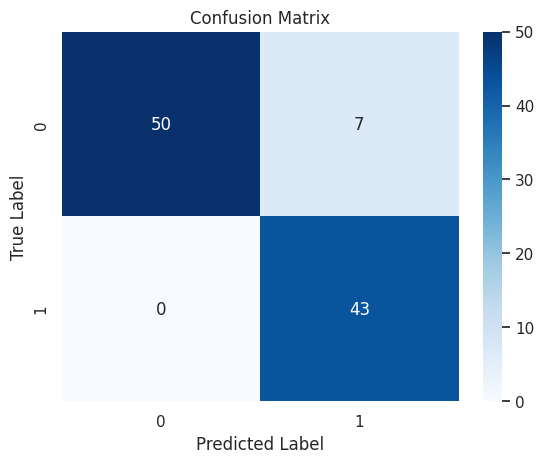

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        57
           1       0.86      1.00      0.92        43

    accuracy                           0.93       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.93      0.93       100



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test are the true labels and y_pred are the predicted labels from your classifier

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Draw the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate performance metrics
report = classification_report(y_test, y_pred)
print(report)

## Dataset 2 (Image Classification)

Using the dataset of scans of the surfaces of the metal parts (Dataset 2), create a
Convolutional Neural Network (CNN) for classifying whether the scan contains a
defect. Your line manager would ideally like the CNN to be able to distinguish
between different types of defects (a multi-class classification problem).

You should describe the experiments performed to obtain and optimize your final
model; these experiments should be rigorous and include comparisons between
different CNN architectures and hyper-parameter tuning. All choices should be
justified using theory and/or experiments.

The final CNN chosen should be described in all detail – summarizing all relevant
hyper parameters chosen and the network architecture.

You should evaluate your final CNN using a test dataset not used in the prior
experimentation stages using appropriate classification performance metrics, a
confusion matrix and comparison with a trivial baseline. You should provide a written
interpretation of how well your model is performing at the given task considering
these results.

### Meta-Data Loading

In [ ]:
uploaded = files.upload()
alloy_meta = pd.read_csv('COMP1801_CourseworkDataset2_images_metadata.csv')

Saving COMP1801_CourseworkDataset2_images_metadata.csv to COMP1801_CourseworkDataset2_images_metadata.csv


In [ ]:
df_img_meta = pd.DataFrame(data = alloy_meta)
df_img_meta.head()

,Image Filename,Defect,Type
0,scan_0.png,Yes,Splinter
1,scan_1.png,No,None
2,scan_2.png,Yes,Multiple
3,scan_3.png,No,None
4,scan_4.png,No,None


### Data Analysis

In [ ]:
df_img_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Image Filename  1000 non-null   object
 1   Defect          1000 non-null   object
 2   Type            1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [ ]:
df_img_meta.nunique()

Image Filename    1000
Defect               2
Type                 4
dtype: int64

In [ ]:
df_img_meta['Defect'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df_img_meta['Type'].unique()

array(['Splinter', 'None', 'Multiple', 'Large'], dtype=object)

### Exploratory Data Analysis

No     624
Yes    376
Name: Defect, dtype: int64


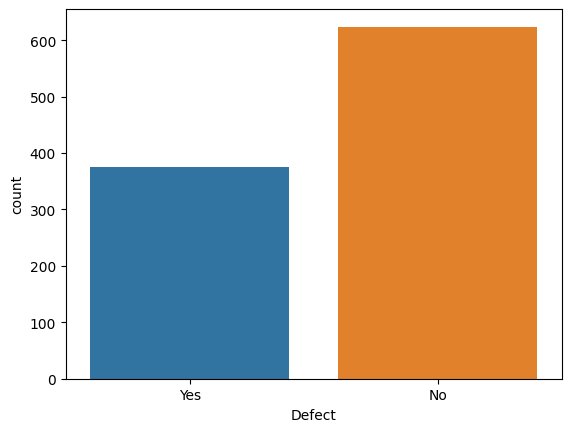

In [ ]:
print(df_img_meta['Defect'].value_counts())
sns.countplot(x='Defect', data = df_img_meta)
plt.show()

None        624
Multiple    254
Splinter     68
Large        54
Name: Type, dtype: int64


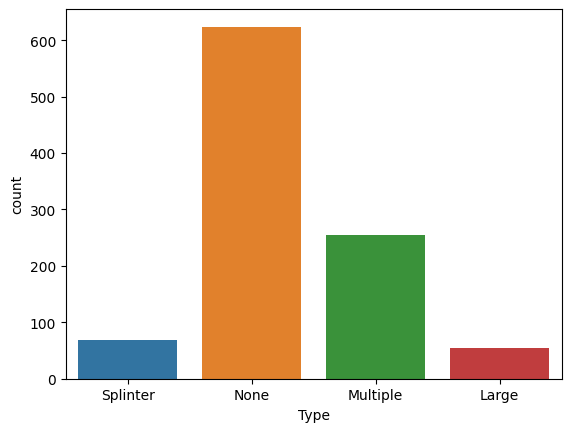

In [ ]:
print(df_img_meta['Type'].value_counts())
sns.countplot(x='Type', data = df_img_meta)
plt.show()

### Loading Image Dataset

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array # Some tensofrlow preprocessing librarie we need to load in local image files
import os # we use this to oad things from the local file system

import numpy as np # A useful package for dealing with mathematical processes, we will be using it this week for vectors and matrices.
import pandas as pd # A common package for viewing tabular data
import matplotlib.pyplot as plt # We will be using Matplotlib for our graphs
import os # we use this to oad things from the local file system
from sklearn.model_selection import train_test_split # A library that can automatically perform data splitting for us
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report, balanced_accuracy_score # Various classification metrics we may find useful

import tensorflow as tf # loads all of tensorflow. This gives us access to everything, but we need to call the correct library
from tensorflow import keras # karas is a hgiher level library built on tensorflow. Most of what we are doing is actually using keras.
from tensorflow.keras import layers, datasets # Import the different model layers and datasets
import tensorflow_datasets as tfds # An alternate way to load tensorflow datasets
from tensorflow.keras.preprocessing.image import load_img, img_to_array # Some tensofrlow preprocessing librarie we need to load in local image files
from keras.models import Model # We'll be using the functional/graphical api for our CNNs
%matplotlib inline

In [ ]:
# Define the directory where your images are located (in colab in our case)
image_directory = "/content/drive/MyDrive/Colab Notebooks/TERM_1/Machine_Learning/Images"

# Define image size - this means we can rescale all our images to be the same size
image_size = (100, 100)

# Create lists to store image data and labels
images = []
labels = []

# Load and preprocess images
for index, row in df_img_meta.iterrows():
    image_path = os.path.join(image_directory, row['Image Filename'])
    image = load_img(image_path, target_size=image_size)
    image_array = img_to_array(image) / 255.0  # Normalize pixel values to [0, 1]
    images.append(image_array)
    labels.append(row['Defect'])

In [ ]:
# Define the number of rows and columns for image visualization
num_images_to_visualize = 9

num_rows = 3
num_columns = num_images_to_visualize // num_rows

# Get a random subset of images from the validation set
subset_indices = np.random.choice(20, num_images_to_visualize, replace=False)

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 10))

# Loop through the subset of images
for i, index in enumerate(subset_indices):
    row = i // num_columns
    col = i % num_columns

    imd=(images[index]*255).astype(np.uint8)

    # Plot the image
    axes[row, col].imshow(imd)
    axes[row, col].axis('off')

    # Set the title with both true and predicted labels
    title = f"Label: {labels[index]}\n"
    axes[row, col].set_title(title)

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()


In [ ]:
class_mapping = {'No': 0, 'Yes': 1}
labels = [class_mapping[label] for label in labels]


images = np.array(images)
labels = np.array(labels)

# Split the data into training and validation sets
X_non_test, X_test, y_non_test, y_test = train_test_split(images, labels, test_size=1/10, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_non_test, y_non_test, test_size=1/9, random_state=42)

### Modeling

In [ ]:
def build_model(input_shape, num_classes, n_conv_blocks=3, n_dense_blocks = 2, DROPOUT=True):
    inputs = keras.Input(shape=input_shape)

    # rescaling layer
    x = layers.Rescaling(1.0 / 255, offset=0)(inputs)

    # convolution blocks
    for _ in range(n_conv_blocks-1):
        x = layers.Conv2D(32, (3, 3), padding = 'SAME', activation='linear')(x)
        # x = layers.Activation("relu")(x)  #separating the activation part from the convolution part adds flexibility
        x = layers.MaxPooling2D((2, 2))(x)
        if DROPOUT:
            x = layers.Dropout(0.5)(x)

    # final convolution block (we add a Flatten Layer as well)
    x = layers.Conv2D(32, (3, 3), padding = 'SAME', activation='linear')(x)
    # x = layers.Activation("relu")(x) #separating the activation part from the convolution part adds flexibility
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    if DROPOUT:
        x = layers.Dropout(0.5)(x)

    # Dense block
    for _ in range(n_dense_blocks):
        x = layers.Dense(1000, activation='relu')(x)
        if DROPOUT:
            x = layers.Dropout(0.5)(x)

    # Output
    # REMEMBER THAT: sigmoid activation is for binary classification, softmax for multi-class
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    # flatten the output first
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


desired_image_size = (100, 100)
num_classes=3
model = build_model(input_shape=desired_image_size + (3,), num_classes=num_classes)

# as metric we choose the accuracy: the total number of correct predictions made
if num_classes==2:
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=['accuracy'])
else:
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 50, 50, 32)        0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 50, 50, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 50, 50, 32)        9248      
                                                           

In [ ]:
# Training

history = model.fit(X_train, y_train, epochs=200, batch_size=100, validation_data=(X_valid, y_valid))

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
validation_loss, validation_accuracy = model.evaluate(X_valid, y_valid)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Validation loss: {validation_loss:.4f}")
print(f"Validation accuracy: {validation_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

4/4 [==============================] - 0s 7ms/step - loss: 0.1326 - accuracy: 0.9800
Validation loss: 0.1279
Validation accuracy: 0.9600
Test loss: 0.1326
Test accuracy: 0.9800


4/4 [==============================] - 0s 5ms/step
The accuracy on the test data: 0.98
The F1 score on the test data: 0.978298611111111
Precision on test data: 0.9846153846153847
Recall on test data: 0.972972972972973


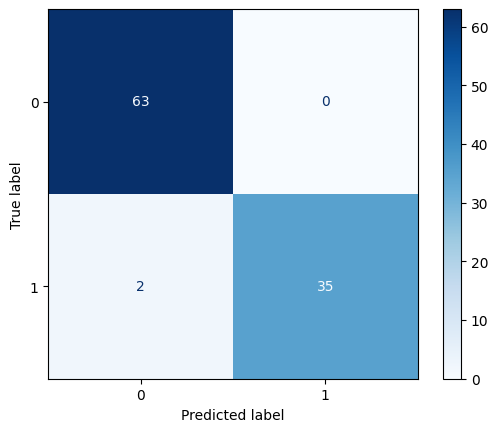

In [ ]:
pred_labels = model.predict(X_test)
pred_labels = np.argmax(pred_labels, axis=1)

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels))
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)

acc_test = accuracy_score(y_test, pred_labels)
f1_test = f1_score(y_test, pred_labels, average='macro')
print('The accuracy on the test data:', acc_test)
print('The F1 score on the test data:', f1_test)
pre_test = precision_score(y_test, pred_labels, average='macro')
print('Precision on test data:', pre_test)
reca_test = recall_score(y_test, pred_labels, average='macro')
print('Recall on test data:', reca_test)

4/4 [==============================] - 0s 7ms/step


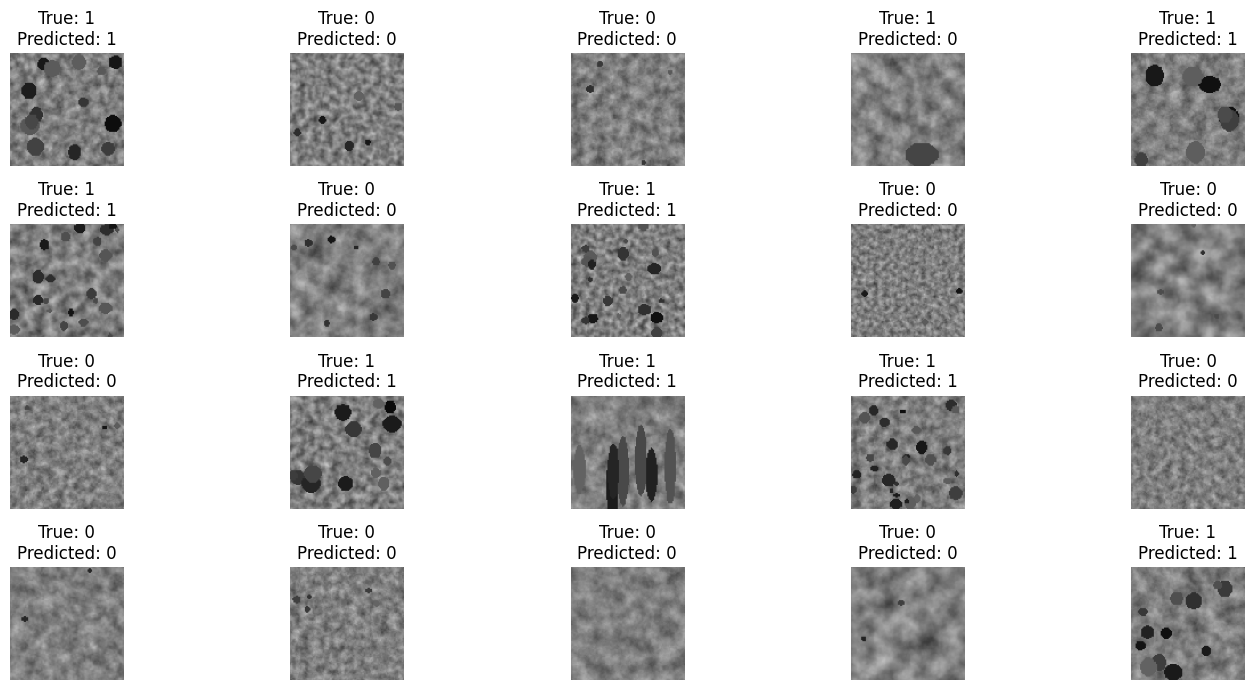

In [ ]:
# Define the number of rows and columns for image visualization
num_images_to_visualize = 20

num_rows = 4
num_columns = num_images_to_visualize // num_rows

# Get a random subset of images from the validation set
subset_indices = np.random.choice(20, num_images_to_visualize, replace=False)

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 7))

predicted_prob = model.predict(X_test)
predicted_classes = np.argmax(predicted_prob, axis=1)

predicted_classes_name = predicted_classes

# Loop through the subset of images
for i, index in enumerate(subset_indices):
    row = i // num_columns
    col = i % num_columns

    imd=(X_test[index]*255).astype(np.uint8)

    # Plot the image
    axes[row, col].imshow(imd)
    axes[row, col].axis('off')

    # Set the title with both true and predicted labels
    title = f"True: {y_test[index]}\nPredicted: {predicted_classes[index]}"
    axes[row, col].set_title(title)

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()

In [ ]:
print(f'Shape of the training data: {X_train.shape}')
print(f'Shape of the training target: {y_train.shape}')
print(f'Shape of the test data: {X_test.shape}')
print(f'Shape of the test target: {y_test.shape}')

Shape of the training data: (800, 100, 100, 3)
Shape of the training target: (800,)
Shape of the test data: (100, 100, 100, 3)
Shape of the test target: (100,)


In [ ]:
# Normalizing
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
from keras.applications.vgg16 import VGG16

# load model without classifier layers
# weights = "imagenet" means that the VGG model was pre-trained on the imagenet dataset
model = VGG16(include_top=False, weights="imagenet", input_shape=(100, 100, 3))

### If we want to freeze these pretrained weights:
#for layer in model.layers:
#    layer.trainable = False


# add new classifier layers
# The input to these classifier layers is the output of the last layer of the VGG
# since we loaded the VGG without its fully connected layers, the last layer we use here is the last convolutional layer
flat1 = layers.Flatten()(model.layers[-1].output)
fc1 = layers.Dense(4096, activation='relu')(flat1)
fc2 = layers.Dense(4096, activation='relu')(fc1)
output = layers.Dense(10, activation='softmax')(fc2)


# define new model
model = Model(inputs=model.inputs, outputs=output)

model.compile(tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0   

Epoch 1/10
2/2 [==============================] - 93s 37s/step - loss: 1.7474 - accuracy: 0.2387 - val_loss: 0.7147 - val_accuracy: 0.5900
Epoch 2/10
2/2 [==============================] - 2s 869ms/step - loss: 0.7787 - accuracy: 0.6275 - val_loss: 0.7277 - val_accuracy: 0.3900
Epoch 3/10
2/2 [==============================] - 2s 889ms/step - loss: 0.7227 - accuracy: 0.4725 - val_loss: 0.6908 - val_accuracy: 0.5900
Epoch 4/10
2/2 [==============================] - 2s 878ms/step - loss: 0.6863 - accuracy: 0.6275 - val_loss: 0.6790 - val_accuracy: 0.5900
Epoch 5/10
2/2 [==============================] - 2s 913ms/step - loss: 0.6767 - accuracy: 0.6275 - val_loss: 0.6825 - val_accuracy: 0.5900
Epoch 6/10
2/2 [==============================] - 2s 864ms/step - loss: 0.6618 - accuracy: 0.6275 - val_loss: 0.6944 - val_accuracy: 0.5900
Epoch 7/10
2/2 [==============================] - 2s 863ms/step - loss: 0.6655 - accuracy: 0.6275 - val_loss: 0.6782 - val_accuracy: 0.5900
Epoch 8/10
2/2 [=====

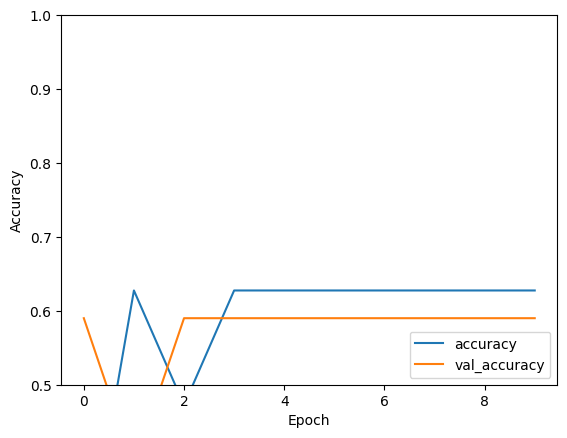

In [ ]:
# Training
history = model.fit(X_train, y_train, epochs=10, batch_size=512,
                    validation_data=(X_valid, y_valid))

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)

## Clustering

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt # We will be using Matplotlib for our graphs
import seaborn as sns; sns.set()  # for plot styling
import numpy as np # A useful package for dealing with mathematical processes, we will be using it this week for vectors and matrices.
import pandas as pd # A common package for viewing tabular data
from sklearn.cluster import KMeans, AgglomerativeClustering, MiniBatchKMeans # The two clustering methods I will be using
from sklearn.datasets import make_blobs, make_moons, fetch_california_housing, load_digits, load_iris, load_breast_cancer # functions to make toy datasets and import some sklearn datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score

In [ ]:
uploaded = files.upload()
alloy_csv = pd.read_csv('COMP1801_CourseworkDataset1_tabular.csv')

Saving COMP1801_CourseworkDataset1_tabular.csv to COMP1801_CourseworkDataset1_tabular (3).csv


In [ ]:
df = pd.DataFrame(data = alloy_csv)
df.head()

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,284.161690,Blade,colGrain,25,4.460592,7.937116,22,0,7,Top,Investment
1,1599.551748,Blade,singleGrain,9,1.425973,2.432948,2,0,0,Bottom,Die
2,768.311031,Nozzle,colGrain,26,2.508879,3.841211,25,0,0,Bottom,Investment
3,1697.663828,Blade,colGrain,12,3.248913,2.610700,10,0,0,Bottom,Continuous
4,1491.478862,Nozzle,colGrain,20,1.901670,4.634926,24,0,0,Top,Die


In [ ]:
scaler = MinMaxScaler()

#features = df.drop(columns=['Lifespan'])
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Fit and transform the data
scaled_data_min_max = scaler.fit_transform(numerical_data)

# Converting back to a DataFrame
scaled_data_min_max_df = pd.DataFrame(scaled_data_min_max, columns=numerical_data.columns)

In [ ]:
df[['Lifespan','coolingRate', 'quenchTime', 'forgeTime', 'smallDefects','largeDefects', 'sliverDefects']] = scaled_data_min_max_df[['Lifespan','coolingRate', 'quenchTime', 'forgeTime', 'smallDefects','largeDefects', 'sliverDefects']]
df

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,0.074631,Blade,colGrain,0.80,0.881908,0.771323,0.666667,0.0,0.7,Top,Investment
1,0.655372,Blade,singleGrain,0.16,0.206009,0.157752,0.060606,0.0,0.0,Bottom,Die
2,0.288381,Nozzle,colGrain,0.84,0.447204,0.314737,0.757576,0.0,0.0,Bottom,Investment
3,0.698688,Blade,colGrain,0.28,0.612031,0.177567,0.303030,0.0,0.0,Bottom,Continuous
4,0.607658,Nozzle,colGrain,0.60,0.311961,0.403215,0.727273,0.0,0.0,Top,Die
...,...,...,...,...,...,...,...,...,...,...,...
995,0.153581,Blade,equiGrain,0.76,0.339123,0.192171,0.606061,0.0,0.0,Bottom,Continuous
996,0.578881,Nozzle,equiGrain,0.64,0.276324,0.689825,0.363636,0.0,0.0,Bottom,Investment
997,0.628229,Blade,colGrain,0.36,0.257877,0.809143,0.363636,0.0,0.0,Top,Investment
998,0.784951,Nozzle,equiGrain,0.16,0.361550,0.447627,0.000000,0.0,0.0,Bottom,Continuous


In [ ]:
le = LabelEncoder()

columns_to_encode = ["microstructure","seedLocation","castType",'partType']

# for col in columns_to_encode:
#   df[col] = le.fit_transform(df[col])

df[columns_to_encode] = df[columns_to_encode].apply(le.fit_transform) # label encoding

df.head()

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,0.074631,0,0,0.80,0.881908,0.771323,0.666667,0.0,0.7,1,2
1,0.655372,0,2,0.16,0.206009,0.157752,0.060606,0.0,0.0,0,1
2,0.288381,2,0,0.84,0.447204,0.314737,0.757576,0.0,0.0,0,2
3,0.698688,0,0,0.28,0.612031,0.177567,0.303030,0.0,0.0,0,0
4,0.607658,2,0,0.60,0.311961,0.403215,0.727273,0.0,0.0,1,1


In [ ]:
X = np.array(df)

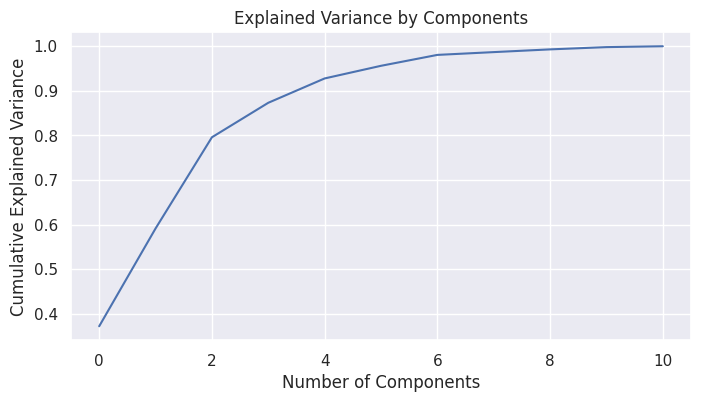

Number of components to explain 95% of variance: 6


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming X is your data
pca = PCA().fit(X)

# Plotting the cumulative sum of eigenvalues (explained variance ratio)
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

# Selecting the number of components that explain at least 95% of the variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print(f"Number of components to explain 95% of variance: {n_components_95}")

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming X is already defined and has 10 variables/features
X_LP = X[:, 1:10]  # Select columns 1 to 10 (9 features based on zero-indexing)

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_LP)

# Set up the subplot layout with 5 rows and 2 columns for 10 subplots
fig, axs = plt.subplots(5, 2, figsize=(12, 30))  # Adjusted the figure size
fig.suptitle('KMeans Clustering with Silhouette Score', fontsize=16)
axs = axs.flatten()  # Flatten the axs array for easy indexing

# Loop over a range of k values
for k in range(2, 12):  # Changed to range(2, 12) to include k from 2 to 11 for 10 plots
    # KMeans clustering
    model = KMeans(n_clusters=k, n_init='auto')
    cluster_labels = model.fit_predict(X_LP)  # Cluster on the original data

    # Silhouette Score
    score = silhouette_score(X_LP, cluster_labels)

    # Scatter Plot on the PCA-reduced data
    axs[k-2].scatter(X_pca[:, 1], X_pca[:, 2], c=cluster_labels, s=50, cmap='viridis')
    centers = pca.transform(model.cluster_centers_)  # Project cluster centers to PCA space
    axs[k-2].scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)  # Plot cluster centers
    axs[k-2].set_title(f'k={k}, Silhouette Score: {score:.4f}')

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming X is already defined and has 10 variables/features
X_LP = X[:, 1:10]  # Select columns 1 to 10 (9 features based on zero-indexing)

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_LP)

# Set up the subplot layout with 5 rows and 2 columns for 10 subplots
fig, axs = plt.subplots(5, 2, figsize=(12, 30))  # Adjusted the figure size
fig.suptitle('KMeans Clustering with Silhouette Score', fontsize=16)
axs = axs.flatten()  # Flatten the axs array for easy indexing

# Loop over a range of k values
for k in range(2, 12):  # Changed to range(2, 12) to include k from 2 to 11 for 10 plots
    # KMeans clustering
    model = KMeans(n_clusters=k, n_init='auto')
    cluster_labels = model.fit_predict(X_LP)  # Cluster on the original data

    # Silhouette Score
    score = silhouette_score(X_LP, cluster_labels)

    # Scatter Plot on the PCA-reduced data
    axs[k-2].scatter(X_pca[:, 3], X_pca[:, 4], c=cluster_labels, s=50, cmap='viridis')
    centers = pca.transform(model.cluster_centers_)  # Project cluster centers to PCA space
    axs[k-2].scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)  # Plot cluster centers
    axs[k-2].set_title(f'k={k}, Silhouette Score: {score:.4f}')

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()